In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from datetime import datetime

# Loading Data

In [2]:
data_folder = './pickles/dataframes'

In [3]:
dataset = pd.read_json(data_folder + '/unified_data.json')

In [10]:
dataset = dataset.drop('ingredients_x',axis=1)

In [13]:
dataset.to_json(data_folder + '/unified_data2.json')

# Initial Analysis

We first want to see the number of recipes in the dataset we have.

In [4]:
print("Number of unique recipes in the dataset = {}".format(dataset['name'].unique().shape[0]))

Number of unique recipes in the dataset = 15986


## Rating distribution

In [5]:
ratings_counts = dict(Counter(dataset['rating'].values))

Text(0.5,0,'Frequency')

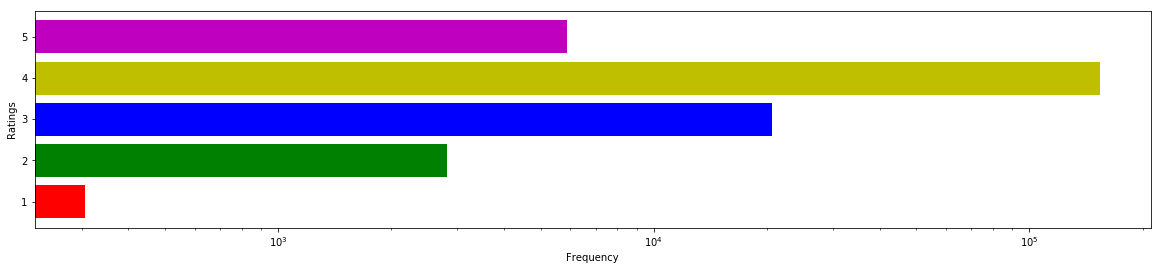

In [6]:
plt.rcParams["figure.figsize"] = (20,4)
plt.barh(ratings_counts.keys(),ratings_counts.values(), align='center',color='rgbym',log=True)
plt.ylabel('Ratings')
plt.xlabel('Frequency')

## Distribution of meal sizes

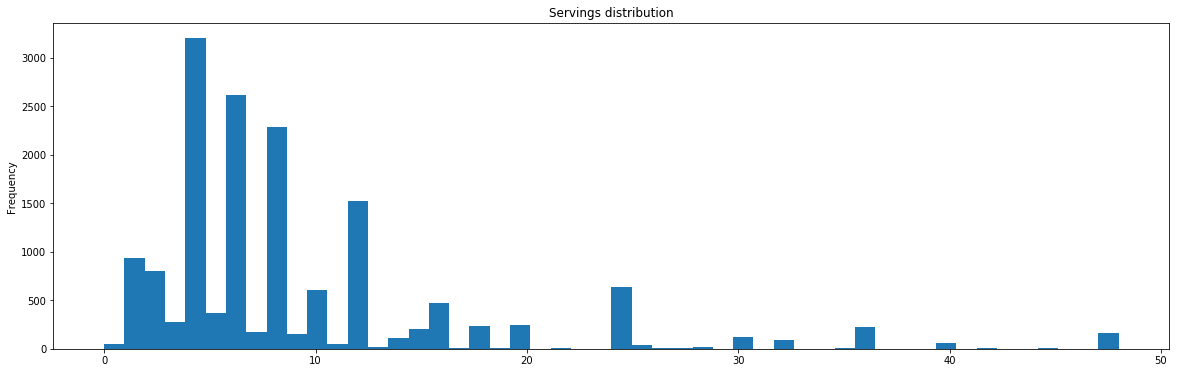

In [7]:
dataset_servings = dataset[['name','servings']]
dataset_servings =  dataset_servings.groupby(['name']).mean().round()
servings = dataset_servings[(dataset_servings['servings'] >= 0) & (dataset_servings['servings'] < 50)]
servings['servings'].plot(kind='hist', bins=50, figsize=(20,6), title='Servings distribution')

## Distribution of reviews over time

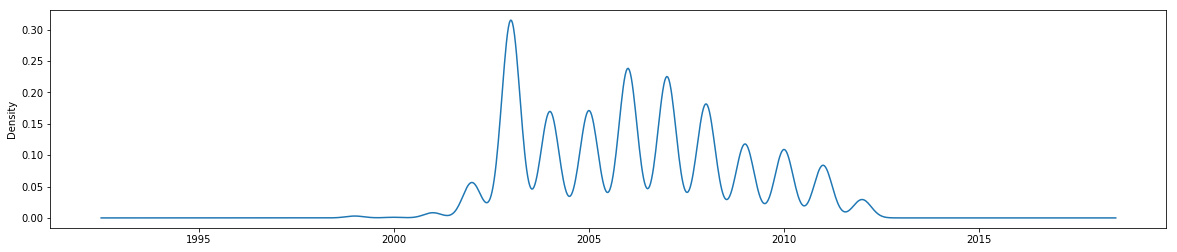

In [8]:
dataset.year.plot.density()

## Nutrition vs Ratings

In [9]:
cols = [ 'name',u'calories', u'cholesterol',u'cook_time', u'day', u'fat', u'fiber',u'protein', u'servings', u'sodium', u'totalcarbs', u'rating']
dataset_nutrition = dataset[cols]

In [10]:
dataset_nutrition = dataset_nutrition.groupby(['name']).mean().round()

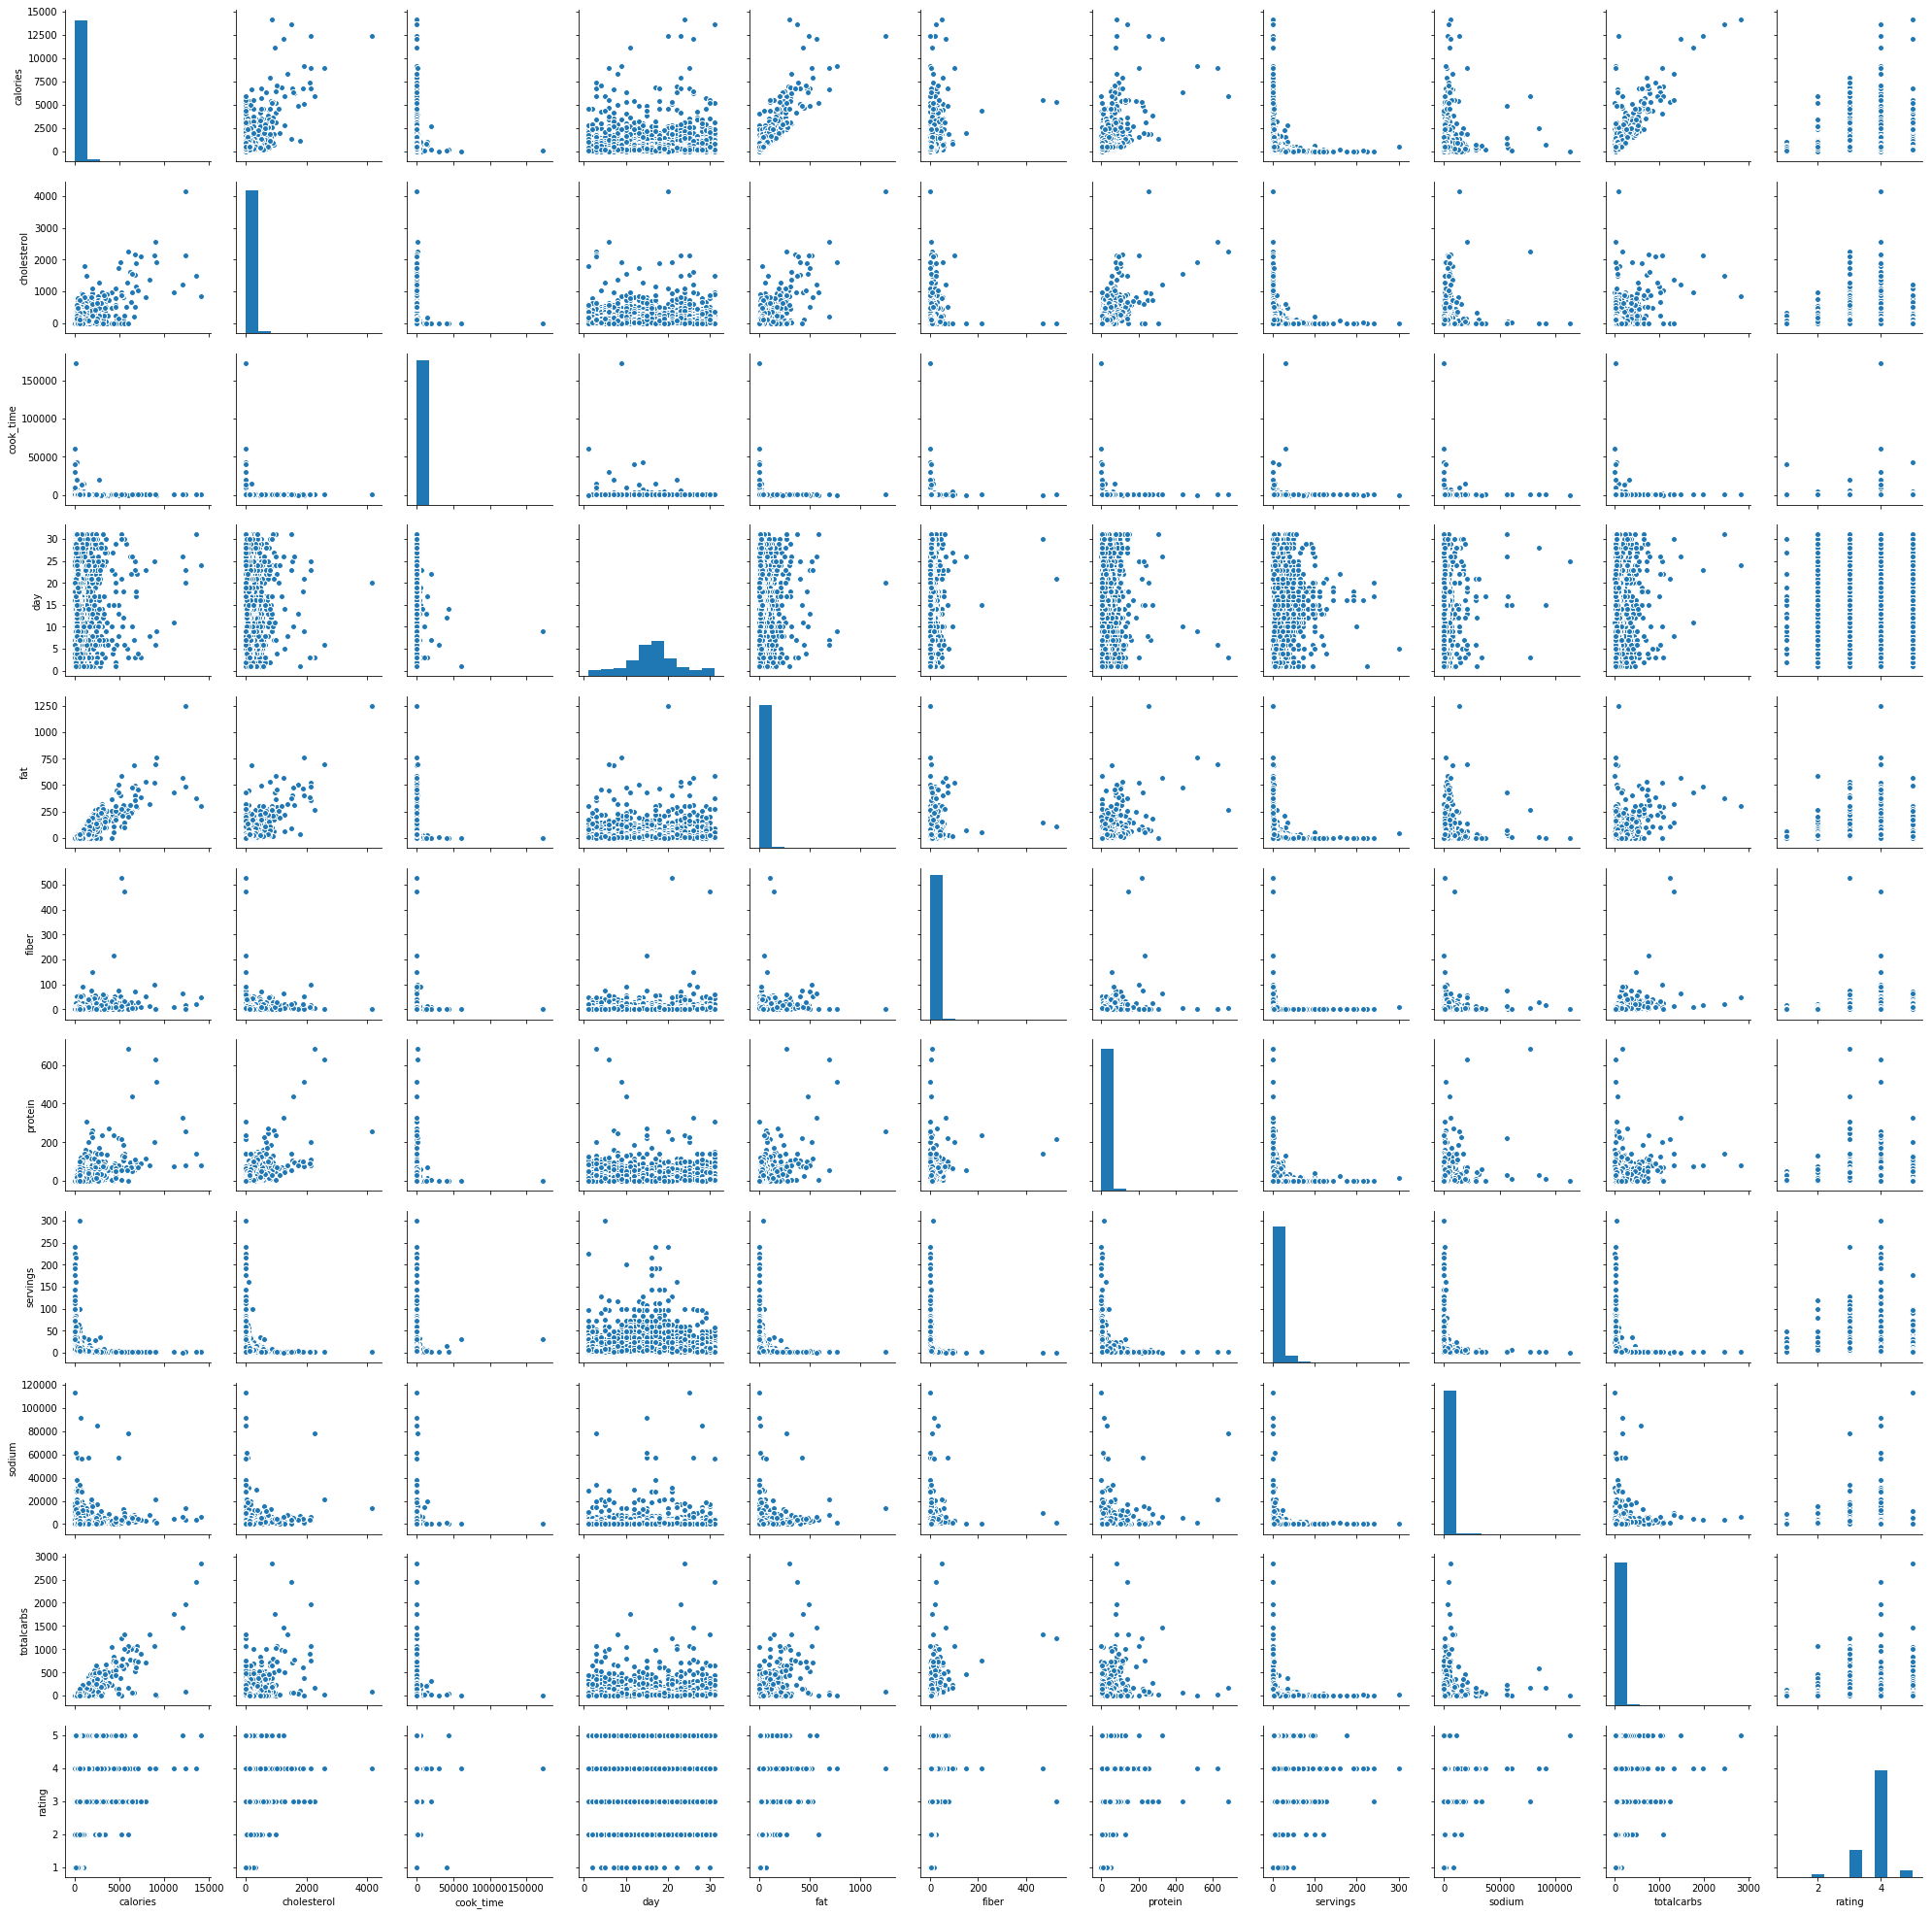

In [11]:
sns.pairplot(dataset_nutrition)

## Time for preparing and cooking the meal

#### TODO : group by don't forget

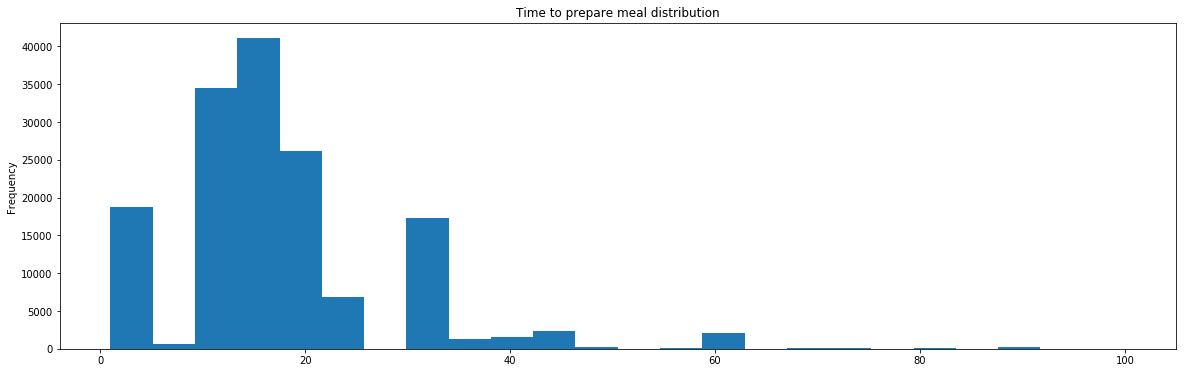

In [12]:
prep_time = dataset[(dataset['prep_time'] > 0) & (dataset['prep_time'] < 120)]
prep_time['prep_time'].plot(kind='hist', bins=24, figsize=(20,6),title='Time to prepare meal distribution')

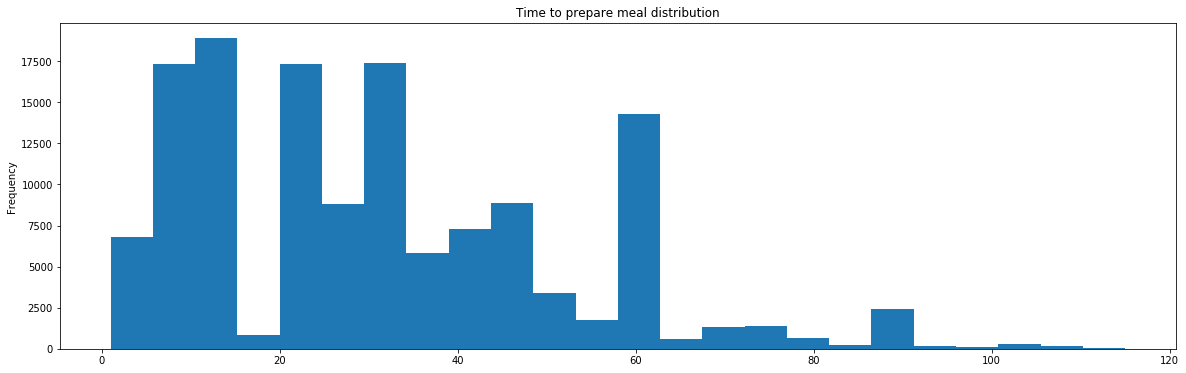

In [13]:
cook_time = dataset[(dataset['cook_time'] > 0) & (dataset['cook_time'] < 120)]
cook_time['cook_time'].plot(kind='hist', bins=24, figsize=(20,6),title='Time to prepare meal distribution')

## TODO List

1. All types of foods using [DONE]
2. Distribution of servings against ratings [DONE]
3. Combine preperation time and cooking time with servings against rating [DONE]
4. Combine food types [DONE]
5. Combine nutrition
6. Analysis over specific year (mood of people over time) [DONE]
7. Graph of recipes sharing ingredients and does more connectedness imply a higher rating
8. Neural net

/home/omar/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/omar/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/omar/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/omar/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/omar/anaconda2/lib/python2.7/site-pack

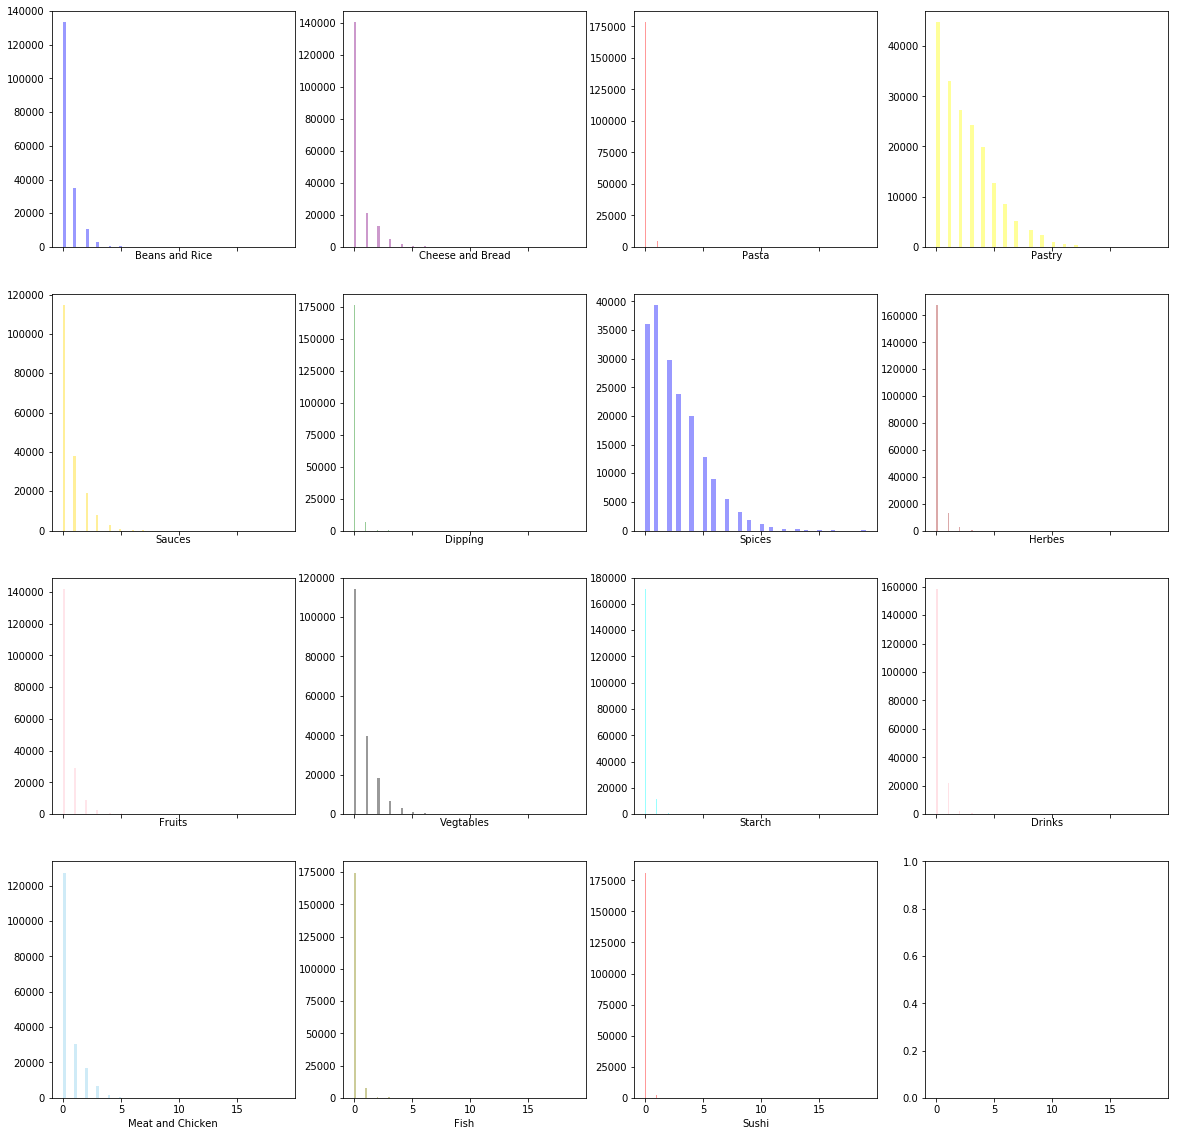

In [14]:
f, axes = plt.subplots(4, 4, figsize=(20,20), sharex=True)

#first row
sns.distplot( dataset['Beans and Rice'] , color="blue", ax=axes[0, 0],kde=False)
sns.distplot( dataset['Cheese and Bread'] , color="purple", ax=axes[0, 1],kde=False)
sns.distplot( dataset['Pasta'] , color="red", ax=axes[0, 2],kde=False)
sns.distplot( dataset['Pastry'] , color="yellow", ax=axes[0, 3],kde=False)

# second row
sns.distplot( dataset['Sauces'] , color="gold", ax=axes[1, 0],kde=False)
sns.distplot( dataset['Dipping'] , color="green", ax=axes[1, 1],kde=False)
sns.distplot( dataset['Spices'] , color="blue", ax=axes[1, 2],kde=False)
sns.distplot( dataset['Herbes'] , color="brown", ax=axes[1, 3],kde=False)


sns.distplot( dataset['Fruits'] , color="pink", ax=axes[2, 0],kde=False)
sns.distplot( dataset['Vegtables'] , color="black", ax=axes[2, 1],kde=False)
sns.distplot( dataset['Starch'] , color="aqua", ax=axes[2, 2],kde=False)
sns.distplot( dataset['Drinks'] , color="lightpink", ax=axes[2, 3],kde=False)


# fourth row

sns.distplot( dataset['Meat and Chicken'] , color="skyblue", ax=axes[3, 0],kde=False)
sns.distplot( dataset['Fish'] , color="olive", ax=axes[3, 1],kde=False)
sns.distplot( dataset['Sushi'] , color="red", ax=axes[3, 2],kde=False)




# Observing the effect of time on users sentiment

In [15]:
prep_time_data = dataset[['name','prep_time','rating']].copy()
cook_time_data = dataset[['name','cook_time','rating']].copy()

In [16]:
prep_time_data = prep_time_data.groupby('name').agg({'rating':'mean', 'prep_time':'first'})
cook_time_data = cook_time_data.groupby('name').agg({'rating':'mean','cook_time':'first'})
prep_time_data['rating'] = prep_time_data['rating'].round()
cook_time_data['rating'] = cook_time_data['rating'].round()

In [17]:
def bucketing_time(time_point):
    
    if time_point == 0:
        return 'No time'
    elif time_point in range(1,11):
        return 'In ten minutes'
    elif time_point in range(11,60):
        return '< 1hr'
    elif time_point in range(60,121):
        return '1hrs > and < 2hrs'
    else:
        return 'more than 2hrs'
    

In [18]:
prep_time_data['prep_time'] = prep_time_data['prep_time'].apply(lambda x: bucketing_time(x))
cook_time_data['cook_time'] = cook_time_data['cook_time'].apply(lambda x: bucketing_time(x))

In [19]:
prep_time_data_temp = prep_time_data.copy().reset_index(drop=True)
cook_time_data_temp = cook_time_data.copy().reset_index(drop=True)

In [20]:
unique_notations = prep_time_data_temp['prep_time'].unique().tolist()

In [21]:
prep_dist = {}
cook_dist = {}

for key in unique_notations:
    
    subset_prep_data = prep_time_data_temp[ prep_time_data_temp.prep_time == key]
    subset_cook_data = cook_time_data_temp[ cook_time_data_temp.cook_time == key]
    
    out_prep = subset_prep_data['rating'].value_counts().to_dict()
    out_cook = subset_cook_data['rating'].value_counts().to_dict()
    
    for i in out_prep.keys():
        if i not in prep_dist:
            prep_dist[i] = {key:out_prep[i]}
        else:
            prep_dist[i][key] = out_prep[i]
            
    for i in out_cook.keys():
        if i not in cook_dist:
            cook_dist[i] = {key:out_cook[i]}
        else:
            cook_dist[i][key] = out_cook[i]

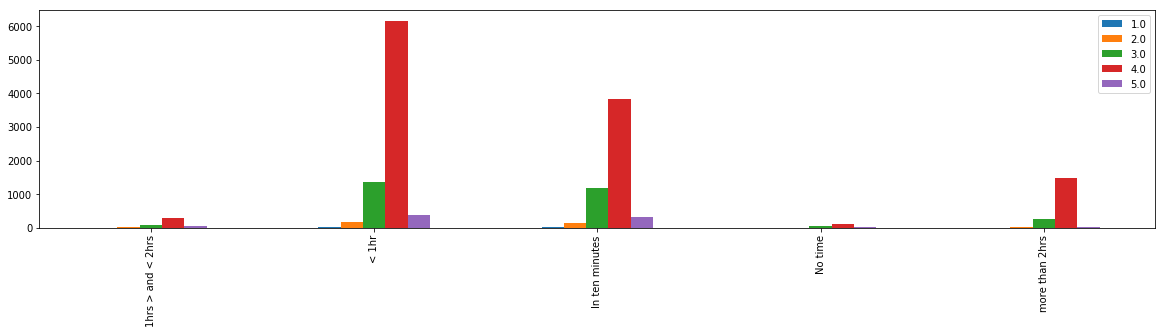

In [22]:
pd.DataFrame(prep_dist).plot.bar()

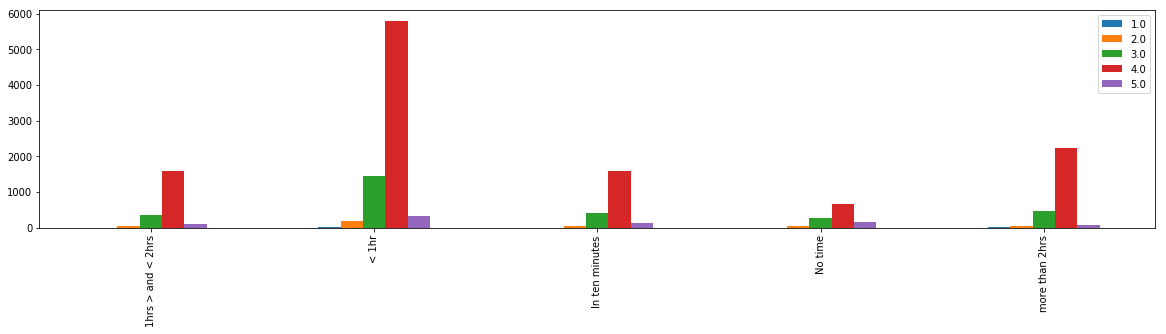

In [23]:
pd.DataFrame(cook_dist).plot.bar()

# Observing the effect of servings size on user sentiment

In [24]:
servings_data = dataset[['name','servings','rating']].copy()

In [25]:
servings_data = servings_data.groupby('name').agg({'rating':'mean', 'servings':'first'})
servings_data['rating'] = servings_data['rating'].round()

In [26]:
def bucketing_meal_sizes(meal_size):
    
    if meal_size == 1:
        return 'individual'
    elif meal_size == 2:
        return 'couple'
    elif meal_size in range(3,10):
        return 'family'
    elif meal_size in range(11,30):
        return 'Big family'
    else:
        return 'Event'    

In [27]:
servings_data['servings'] = servings_data['servings'].apply(lambda x: bucketing_meal_sizes(x))

In [28]:
servings_data_temp = servings_data.copy().reset_index(drop=True)

In [29]:
unique_notations = servings_data['servings'].unique().tolist()

In [31]:
serving_dist = {}

for key in unique_notations:
    
    subset_serving_data = servings_data_temp[ servings_data_temp.servings == key]
    
    out = subset_serving_data['rating'].value_counts().to_dict()
    
    for i in out.keys():
        if i not in serving_dist:
            serving_dist[i] = {key:out[i]}
        else:
            serving_dist[i][key] = out[i]

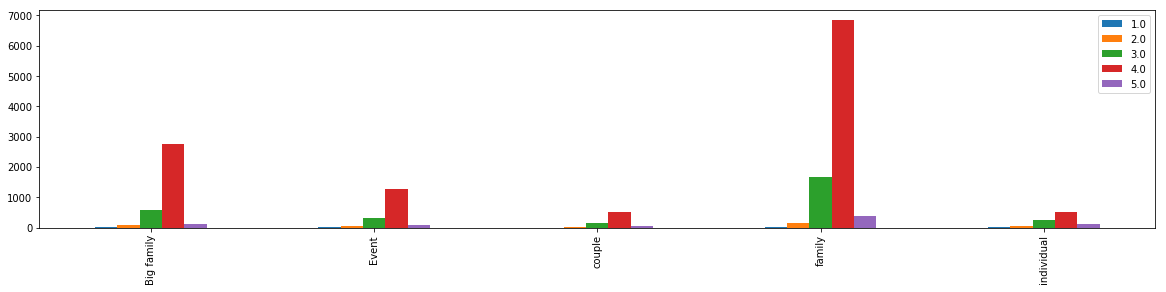

In [32]:
pd.DataFrame(serving_dist).plot.bar()

# Combining the meal size and time to prepare the meals

In [58]:
combined_sets = pd.concat([servings_data,prep_time_data[['prep_time']],cook_time_data[['cook_time']]], axis=1, join_axes=[servings.index])

In [59]:
combined_sets.head()

,rating,servings,prep_time,cook_time
name,,,,
""" Ant"" Kelly's London Broil Marinade",5.0,family,< 1hr,more than 2hrs
""" Creamy "" Vegan Potato-Leek Soup",3.0,family,< 1hr,< 1hr
""" Da Best"" Chicago-Style Italian Beef",4.0,family,more than 2hrs,1hrs > and < 2hrs
""" Healthy"" Pumpkin Pie",4.0,family,In ten minutes,1hrs > and < 2hrs
""" Jamba Juice at Home"" Strawberries Wild Smoothie",5.0,family,No time,In ten minutes


In [67]:
meal_size_un,prep_time_un = (np.unique(combined_sets['servings'].values)).tolist(),np.unique(combined_sets['prep_time'].values).tolist()

In [68]:
combinations = [(a,b) for a in meal_size_un for b in prep_time_un]

In [77]:
result_dict = {}
for comb in combinations:
    subset_data = combined_sets[ (combined_sets.servings==comb[0]) & (combined_sets.prep_time == comb[1]) ]
    rating_counts = subset_data.rating.value_counts()
    
    key = comb[0] + ' and ' + comb[1]
    
    for i in rating_counts.keys():
        if i not in result_dict:
            result_dict[i] = {key:rating_counts[i]}
        else:
            result_dict[i][key] = rating_counts[i]

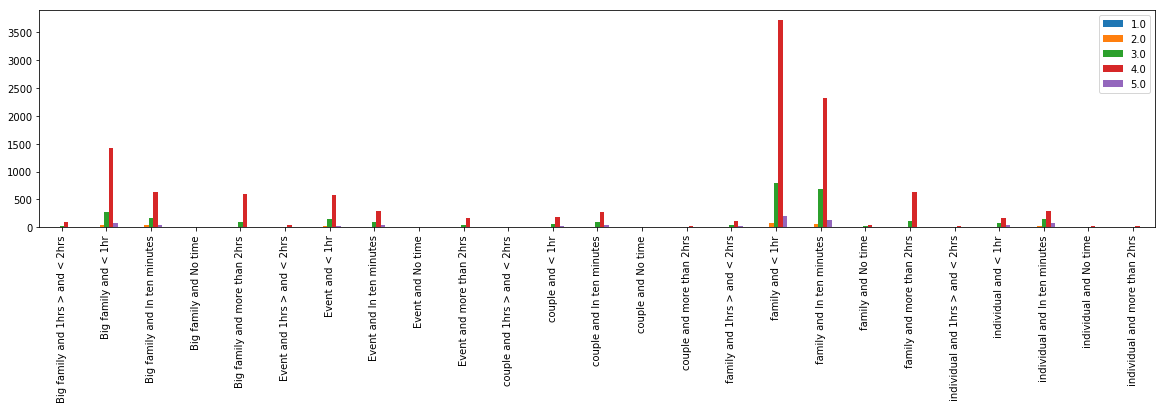

In [79]:
pd.DataFrame(result_dict).plot.bar()

# Viewing how the composition of ingredients effects the rating

In [4]:
food_cols = ['Beans and Rice','Cheese and Bread','Dipping','Drinks','Fish','Fruits','Herbes','Meat and Chicken', 'Pasta', 'Pastry','Sauces','Spices','Starch','Vegtables']

In [5]:
food_cols_data = (dataset[['name','rating'] + food_cols]).copy()
food_cols_data = food_cols_data.groupby('name').agg({'Beans and Rice': 'first',
                                                     'Cheese and Bread': 'first',
                                                     'Dipping': 'first',
                                                     'Drinks': 'first',
                                                     'Fish': 'first',
                                                     'Fruits': 'first',
                                                     'Herbes': 'first',
                                                     'Meat and Chicken': 'first', 
                                                     'Pasta': 'first',
                                                     'Pastry': 'first',
                                                     'Sauces': 'first',
                                                     'Spices': 'first',
                                                     'Starch': 'first',
                                                     'Vegtables':'first',
                                                     'rating':'mean'
                                                    })
food_cols_data['rating'] = food_cols_data['rating'].round()

In [6]:
food_cols_data.head()

,rating,Cheese and Bread,Meat and Chicken,Dipping,Herbes,Fruits,Spices,Beans and Rice,Vegtables,Starch,Fish,Pastry,Pasta,Sauces,Drinks
name,,,,,,,,,,,,,,,
""" Ant"" Kelly's London Broil Marinade",5.0,0,2,0,0,0,3,0,0,0,0,1,0,3,0
""" Creamy "" Vegan Potato-Leek Soup",3.0,0,1,0,0,0,2,0,4,0,0,0,0,0,0
""" Da Best"" Chicago-Style Italian Beef",4.0,0,2,0,0,0,2,0,0,0,0,1,0,0,0
""" Healthy"" Pumpkin Pie",4.0,0,0,0,0,2,1,0,0,0,0,7,0,0,0
""" Jamba Juice at Home"" Strawberries Wild Smoothie",5.0,0,0,0,0,2,0,0,0,0,0,0,0,0,0


In [7]:
correlations = food_cols_data.corr()['rating']

In [8]:
display(correlations)

rating              1.000000
Cheese and Bread    0.035855
Meat and Chicken    0.002136
Dipping            -0.008030
Herbes              0.046591
Fruits              0.038729
Spices              0.040082
Beans and Rice      0.026723
Vegtables           0.009005
Starch              0.004988
Fish                0.008741
Pastry             -0.074830
Pasta               0.002107
Sauces              0.043827
Drinks              0.030005
Name: rating, dtype: float64

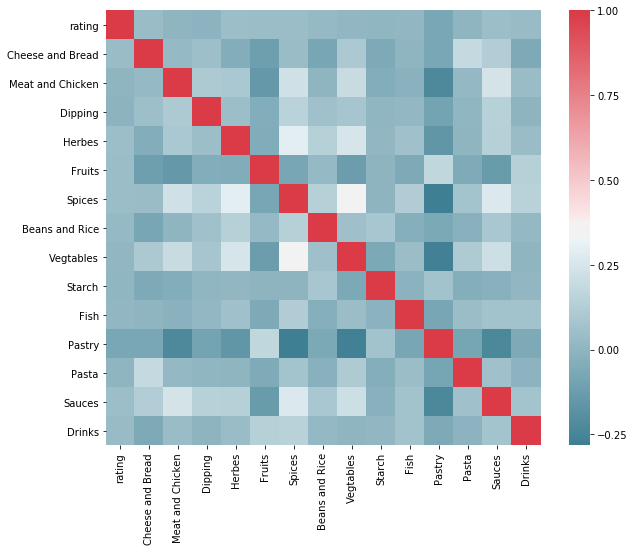

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
corr = food_cols_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True,ax=ax)

In [10]:
def bucket_food_category(food_type):
    
    if food_type == 0:
        return 'Not Used'
    elif food_type in range(1,6):
        return 'Moderate Use'
    else:
        return 'Extensive Use'

In [11]:
for i in range(0,len(food_cols)):
    food_cols_data[food_cols[i]] = food_cols_data[food_cols[i]].apply(lambda x : bucket_food_category(x))

In [12]:
food_cols_data.head()

,rating,Cheese and Bread,Meat and Chicken,Dipping,Herbes,Fruits,Spices,Beans and Rice,Vegtables,Starch,Fish,Pastry,Pasta,Sauces,Drinks
name,,,,,,,,,,,,,,,
""" Ant"" Kelly's London Broil Marinade",5.0,Not Used,Moderate Use,Not Used,Not Used,Not Used,Moderate Use,Not Used,Not Used,Not Used,Not Used,Moderate Use,Not Used,Moderate Use,Not Used
""" Creamy "" Vegan Potato-Leek Soup",3.0,Not Used,Moderate Use,Not Used,Not Used,Not Used,Moderate Use,Not Used,Moderate Use,Not Used,Not Used,Not Used,Not Used,Not Used,Not Used
""" Da Best"" Chicago-Style Italian Beef",4.0,Not Used,Moderate Use,Not Used,Not Used,Not Used,Moderate Use,Not Used,Not Used,Not Used,Not Used,Moderate Use,Not Used,Not Used,Not Used
""" Healthy"" Pumpkin Pie",4.0,Not Used,Not Used,Not Used,Not Used,Moderate Use,Moderate Use,Not Used,Not Used,Not Used,Not Used,Extensive Use,Not Used,Not Used,Not Used
""" Jamba Juice at Home"" Strawberries Wild Smoothie",5.0,Not Used,Not Used,Not Used,Not Used,Moderate Use,Not Used,Not Used,Not Used,Not Used,Not Used,Not Used,Not Used,Not Used,Not Used


In [13]:
test = {}
cols = food_cols_data.columns.values.tolist()
check = ['Not Used','Moderate Use','Extensive Use']

for col in cols[1:]:
    
    for val in check:
    
        subset_food = food_cols_data[ food_cols_data[col] == val]
        subset_food = subset_food[[col,'rating']]
        subset_count = subset_food['rating'].value_counts().to_dict()
        
        for i in range(1,6):
            if i not in subset_count:
                subset_count[i] = 0
        
        
        if val not in test:
            test[val] = {col:subset_count}
        else:
            test[val][col] = subset_count

In [14]:
check = []
for key in test.keys():
    check.append(pd.DataFrame(test[key]).T)

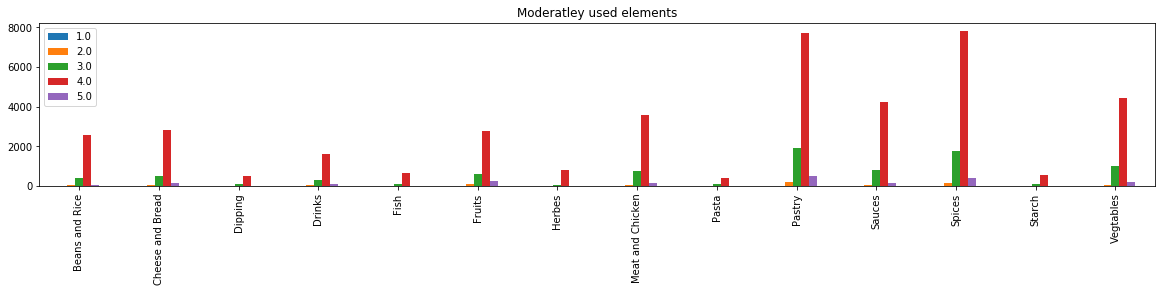

In [15]:
plt.rcParams["figure.figsize"] = (20,3)
check[0].plot.bar(title='Moderatley used elements')

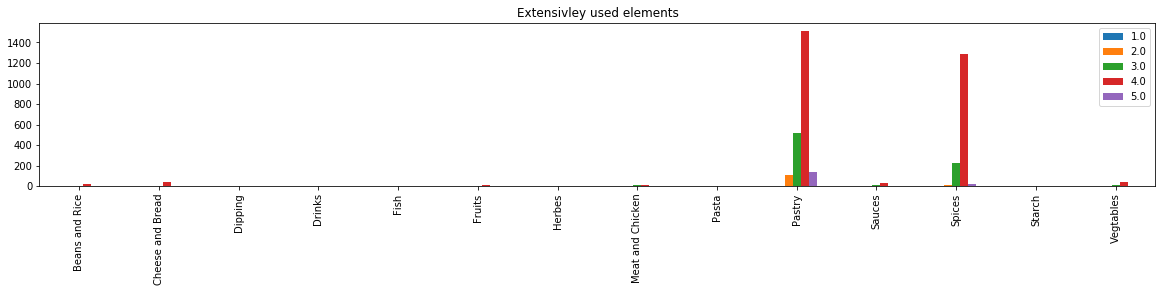

In [16]:
plt.rcParams["figure.figsize"] = (20,3)
check[1].plot.bar(title = 'Extensivley used elements')

In [17]:
test = food_cols_data.copy()

In [18]:
test= test[test.columns[1:]]

In [19]:
test = test.reset_index()

In [20]:
test = test.drop('name',axis=1)

In [21]:
test.head()

,Cheese and Bread,Meat and Chicken,Dipping,Herbes,Fruits,Spices,Beans and Rice,Vegtables,Starch,Fish,Pastry,Pasta,Sauces,Drinks
0,Not Used,Moderate Use,Not Used,Not Used,Not Used,Moderate Use,Not Used,Not Used,Not Used,Not Used,Moderate Use,Not Used,Moderate Use,Not Used
1,Not Used,Moderate Use,Not Used,Not Used,Not Used,Moderate Use,Not Used,Moderate Use,Not Used,Not Used,Not Used,Not Used,Not Used,Not Used
2,Not Used,Moderate Use,Not Used,Not Used,Not Used,Moderate Use,Not Used,Not Used,Not Used,Not Used,Moderate Use,Not Used,Not Used,Not Used
3,Not Used,Not Used,Not Used,Not Used,Moderate Use,Moderate Use,Not Used,Not Used,Not Used,Not Used,Extensive Use,Not Used,Not Used,Not Used
4,Not Used,Not Used,Not Used,Not Used,Moderate Use,Not Used,Not Used,Not Used,Not Used,Not Used,Not Used,Not Used,Not Used,Not Used


In [22]:
cols = test.columns.values.tolist()

In [23]:
test = test.drop_duplicates().values.tolist()

In [24]:
result_dict = {}
for i in range(0,len(test)):
    
    combination = test[i]
    condition = (food_cols_data[cols[0]] == combination[0] )
    for i in range(1,len(cols[1:])+1):
        condition = condition & (food_cols_data[cols[i]]  == combination[i])
    
    subset_combination = food_cols_data[condition]
    rating_distribution = subset_combination['rating'].value_counts().to_dict()
    
    result_dict[tuple(combination)] = rating_distribution

In [25]:
best_comb = pd.DataFrame(result_dict).T

In [26]:
best_comb = best_comb.fillna(0)

In [27]:
best_comb = best_comb.sort_values(by=[4,5],ascending=False)

In [28]:
best_comb.head()

1.0  \
Not Used Not Used Not Used Not Used Not Used     Not Used     Not Used Not Used     Not Used Not Used Moderate Use  Not Used Not Used Not Used  1.0   
                                                 Moderate Use Not Used Not Used     Not Used Not Used Moderate Use  Not Used Not Used Not Used  3.0   
                                    Moderate Use Moderate Use Not Used Not Used     Not Used Not Used Moderate Use  Not Used Not Used Not Used  3.0   
                                    Not Used     Not Used     Not Used Not Used     Not Used Not Used Extensive Use Not Used Not Used Not Used  0.0   
                                                 Moderate Use Not Used Moderate Use Not Used Not Used Moderate Use  Not Used Not Used Not Used  0.0   

                                                                                                                                                 2.0  \
Not Used Not Used Not Used Not Used Not Used     Not Used     Not Used Not Used     Not Used Not Used Moderate Use  Not Used Not Used Not Used  45.0   
                                                 Moderate Use Not Used Not Used     Not Used Not Used Moderate Use  Not Used Not Used Not Used  11.0   
                                    Moderate Use Moderate Use Not Used Not Used     Not Used Not Used Moderate Use  Not Used Not Used Not Used  17.0   
                                    Not Used     Not Used     Not Used Not Used     Not Used Not Used Extensive Use Not Used Not Used Not Used  30.0   
                                                 Moderate Use Not Used Moderate Use Not Used Not Used Moderate Use  Not Used Not Used Not Used   2.0   

                                                                                                                                                  3.0  \
Not Used Not Used Not Used Not Used Not Used     Not Used     Not Used Not Used     Not Used Not Used Moderate Use  Not Used Not Used Not Used  204.0   
                                                 Moderate Use Not Used Not Used     Not Used Not Used Moderate Use  Not Used Not Used Not Used  114.0   
                                    Moderate Use Moderate Use Not Used Not Used     Not Used Not Used Moderate Use  Not Used Not Used Not Used   77.0   
                                    Not Used     Not Used     Not Used Not Used     Not Used Not Used Extensive Use Not Used Not Used Not Used  162.0   
                                                 Moderate Use Not Used Moderate Use Not Used Not Used Moderate Use  Not Used Not Used Not Used   87.0   

                                                                                                                                                  4.0  \
Not Used Not Used Not Used Not Used Not Used     Not Used     Not Used Not Used     Not Used Not Used Moderate Use  Not Used Not Used Not Used  466.0   
                                                 Moderate Use Not Used Not Used     Not Used Not Used Moderate Use  Not Used Not Used Not Used  404.0   
                                    Moderate Use Moderate Use Not Used Not Used     Not Used Not Used Moderate Use  Not Used Not Used Not Used  374.0   
                                    Not Used     Not Used     Not Used Not Used     Not Used Not Used Extensive Use Not Used Not Used Not Used  286.0   
                                                 Moderate Use Not Used Moderate Use Not Used Not Used Moderate Use  Not Used Not Used Not Used  247.0   

                                                                                                                                                 5.0  
Not Used Not Used Not Used Not Used Not Used     Not Used     Not Used Not Used     Not Used Not Used Moderate Use  Not Used Not Used Not Used  84.0  
                                                 Moderate Use Not Used Not Used     Not Used Not Used Moderate Use  Not Used Not Used Not Used  46.0  
                                 

In [29]:
y_check = best_comb.copy().reset_index().head(10).values.tolist()

In [42]:
top_five_combinations = {}
for i in range(0,len(y_check)):
    comb = y_check[i]
    food_amounts = comb[0:len(comb)-5]
    ratings = comb[-5:]
    res = ""
    for j in range(0,len(cols)):
        use_name = cols[j] + ' (' + food_amounts[j] + ')'
        if food_amounts[j] !='Not Used':
            if res == "":
                res = use_name + '\n'
            else:
                res = res + ' and ' + use_name + '\n'
    top_five_combinations[res] =  {4:comb[-2],5:comb[-1]}

In [43]:
plots = pd.DataFrame(top_five_combinations).T

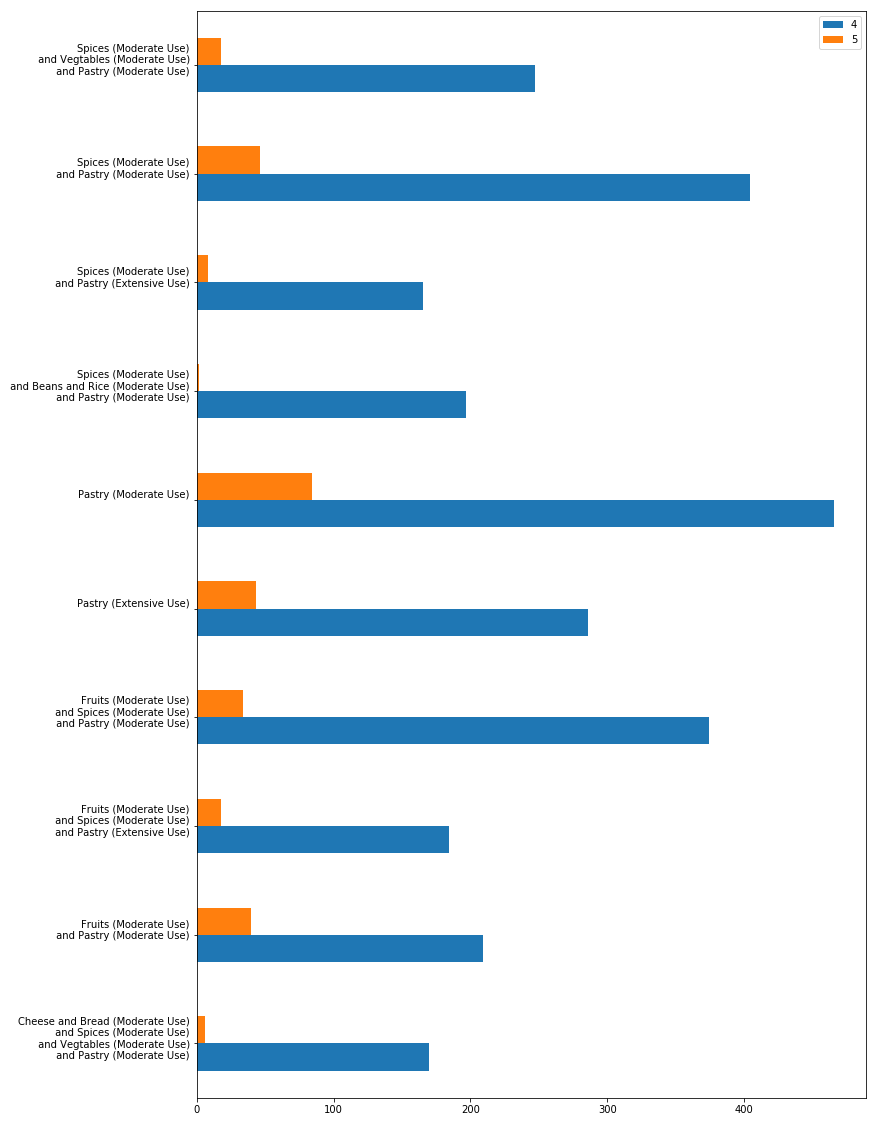

In [44]:
plt.rcParams["figure.figsize"] = (12,20)
plots.plot.barh()

# Studiying ratings against time factor

In [18]:
# selet topmost 5 recipes
unique_recipes = dataset.groupby('name').agg({'rating':'count'})
most_reviewed_recipes = unique_recipes.sort_values(by=['rating'],ascending=False)

In [19]:
most_reviewed_recipes = most_reviewed_recipes.take([0,1,2,3])

In [20]:
most_reviewed_recipes = most_reviewed_recipes.reset_index()

In [21]:
reviewed_names = most_reviewed_recipes['name'].unique()

In [22]:
top_five_recipes = []
for name in reviewed_names:
    top_five_recipes.append(dataset[dataset.name == name])

In [23]:
top_five_recipes = pd.concat(top_five_recipes)

In [24]:
top_five_recipes = top_five_recipes[['name','day','month','year','rating']]

In [25]:
date_info = list(zip(top_five_recipes['day'].values.tolist(),top_five_recipes['month'].values.tolist(),top_five_recipes['year'].values.tolist()))
date_info = list(map(lambda x : datetime(x[2],x[1],x[0]),date_info))

In [26]:
top_five_recipes['date'] = date_info

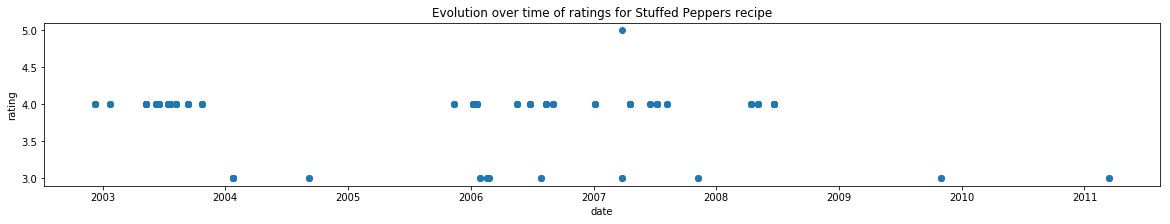

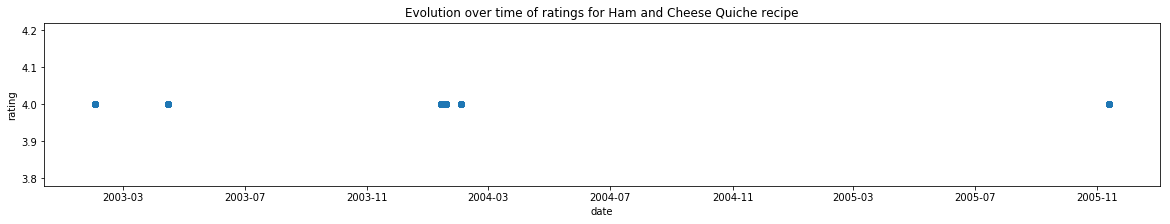

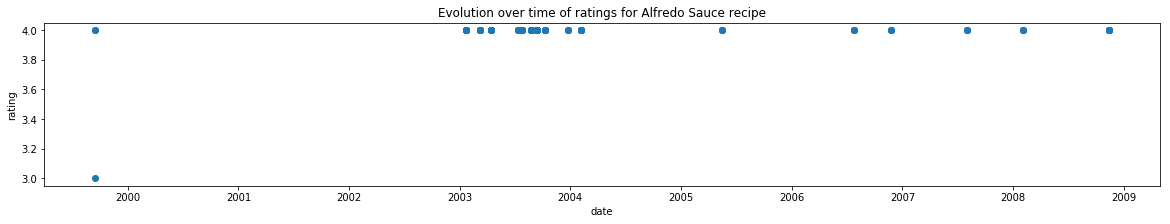

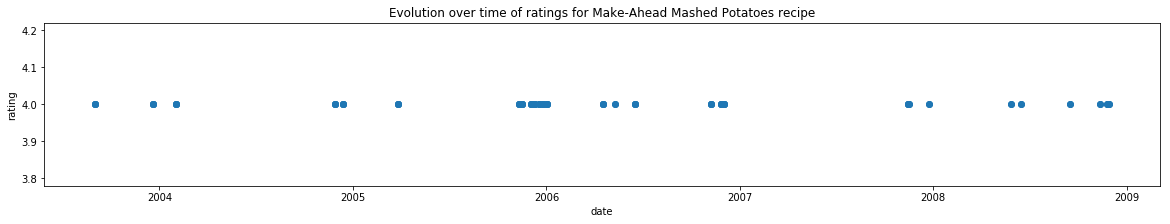

In [27]:
plt.rcParams["figure.figsize"] = (20,3)
for name in reviewed_names:
    subset_data = top_five_recipes[top_five_recipes['name'] == name]
    subset_data = subset_data[['date','rating']]
    plt.plot_date(x=subset_data['date'], y=subset_data['rating'])
    plt.xlabel('date')
    plt.ylabel('rating')
    plt.title('Evolution over time of ratings for ' + name + ' recipe')
    plt.show()